## Import Libraries 

In [608]:
import pandas as pd
import requests  
import os
import json
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering data 

### 1- Twitter-Archive-Enhanced

In [609]:
# GATHER
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

### 2- Image-Predictions

In [610]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(link)
with open(os.path.join('./',link.split('/')[-1]),'wb') as file:
    file.write(response.content)
images_predictions = pd.read_csv('image-predictions.tsv',delimiter='\t')

### 3- Tweet-Json

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [611]:
tweets_info = []
with open('tweet_json.txt','r') as file :
    for line in file :
        tweet = json.loads(line)
        tweet_id = tweet['id']
        tweet_retweet_count = tweet['retweet_count']
        tweet_favorite_count = tweet['favorite_count']
        tweets_info.append({'tweet_id':tweet_id,
        'tweet_retweet_count':tweet_retweet_count ,
        'tweet_favorite_count' : tweet_favorite_count})

tweet_json_df = pd.DataFrame(tweets_info)

## Assessing Data 

In [612]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [613]:
twitter_archive_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [614]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [615]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [616]:
images_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [617]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [618]:
tweet_json_df.head()

,tweet_favorite_count,tweet_id,tweet_retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [619]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_favorite_count    2354 non-null int64
tweet_id                2354 non-null int64
tweet_retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [620]:
tweet_json_df.describe()

,tweet_favorite_count,tweet_id,tweet_retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


## Assessing Data summary (some of the upcoming issues were found visually) :

### Quality issues :

#### 1-only original tweets are required

#### 2-expanded_urls column is useless(need to be dropped)

#### 3- Many dog names are incorrect-starts with lowerscase letters- 

#### 4-The rating_numerator column should be of type float .

#### 5-timestamp's datatype should be converted to "datatime".

#### 6-Remove "_" in image predictions.(p1, p2, p3 column names)

#### 7-convert tweet id's data type into String

#### 8-The rating_numerator column decimal values should  be correctly extracted.

## Tidiness issues :

#### 1-merging 3 data frames

#### 2-dog's breed needs to be in one column 

#### 3-tweet text & dog's photo url are included in one column

#### 4-dog's life Stage needs to be in one column 

## Copying Dataframes

In [621]:
tweet_archive = twitter_archive_enhanced.copy()
images_predictions_copy = images_predictions.copy()
tweet_json_copy = tweet_json_df.copy()

### 1-
### Define: mergine 3 datasets

In [622]:
# Code
tweet_archive = tweet_archive.merge(images_predictions_copy,on='tweet_id',how='inner')
tweet_archive = tweet_archive.merge(tweet_json_copy,on='tweet_id',how='inner')
#TEST
print(tweet_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### 2-
### Define: deleting retweets , replies and keeping the data of the original tweets only

In [623]:
#Code
tweet_archive=tweet_archive[tweet_archive['in_reply_to_status_id'].isnull()]
tweet_archive=tweet_archive[tweet_archive['retweeted_status_id'].isnull()]
tweet_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','img_num',
                             'expanded_urls','jpg_url'],inplace=True)
#Test
print(tweet_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                1971 non-null int64
timestamp               1971 non-null object
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1971 non-null object
doggo                   1971 non-null object
floofer                 1971 non-null object
pupper                  1971 non-null object
puppo                   1971 non-null object
p1                      1971 non-null object
p1_conf                 1971 non-null float64
p1_dog                  1971 non-null bool
p2                      1971 non-null object
p2_conf                 1971 non-null float64
p2_dog                  1971 non-null bool
p3                      1971 non-null object
p3_conf                 1971 non-null float64
p3_dog                  1971 non-null bool

### 3-
### Define: converting tweet_id colum data type into datetime

In [624]:
# code
tweet_archive['tweet_id']=tweet_archive['tweet_id'].astype(str)
#Test
print(tweet_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null object
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1971 non-null object
doggo                   1971 non-null object
floofer                 1971 non-null object
pupper                  1971 non-null object
puppo                   1971 non-null object
p1                      1971 non-null object
p1_conf                 1971 non-null float64
p1_dog                  1971 non-null bool
p2                      1971 non-null object
p2_conf                 1971 non-null float64
p2_dog                  1971 non-null bool
p3                      1971 non-null object
p3_conf                 1971 non-null float64
p3_dog                  1971 non-null boo

### 4-
### Define: converting timestamp colum data type into datetime

In [625]:
#code
tweet_archive['timestamp'] = pd.to_datetime(tweet_archive['timestamp'])
#Test
print(tweet_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1971 non-null object
doggo                   1971 non-null object
floofer                 1971 non-null object
pupper                  1971 non-null object
puppo                   1971 non-null object
p1                      1971 non-null object
p1_conf                 1971 non-null float64
p1_dog                  1971 non-null bool
p2                      1971 non-null object
p2_conf                 1971 non-null float64
p2_dog                  1971 non-null bool
p3                      1971 non-null object
p3_conf                 1971 non-null float64
p3_dog                  1971 non-

### 5-
### Define: replacing incorrect names with None

In [626]:
# code
def name_detection(row) :
    if row['name'][0].islower() == True :
        return 'None'
    else :
        return row['name']
tweet_archive['name'] = tweet_archive.apply(name_detection,axis=1)
tweet_archive.replace('None',np.nan,inplace=True)
#Test
print(list(tweet_archive['name']))


['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax', nan, 'Zoey', 'Cassie', 'Koda', 'Bruno', nan, 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', nan, nan, 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', nan, 'Earl', 'Lola', 'Kevin', nan, 'Yogi', 'Noah', 'Bella', 'Grizzwald', nan, 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', nan, 'Elliot', 'Louis', nan, 'Bella', 'Jesse', nan, 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', nan, 'Cash', 'Jed', nan, 'Sebastian', nan, 'Sierra', nan, nan, 'Monkey', nan, 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', nan, 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', nan, 'Cooper', nan, 'Harold', 'Shikha', nan, 'Lili', 'Jamesy', 'Coco', 'Boomer', 'Sammy', 'Nelly', nan, 'Meatball', 'Paisley', 'Albus', 'Neptu

### 6-
### Define: Remove "_" in image predictions.(p1, p2, p3 column names)

In [627]:
# code
tweet_archive['p1'] = tweet_archive['p1'].str.replace('_',' ')
tweet_archive['p2'] = tweet_archive['p2'].str.replace('_',' ')
tweet_archive['p3'] = tweet_archive['p3'].str.replace('_',' ')
#Test
tweet_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1349 non-null object
doggo                   73 non-null object
floofer                 8 non-null object
pupper                  209 non-null object
puppo                   23 non-null object
p1                      1971 non-null object
p1_conf                 1971 non-null float64
p1_dog                  1971 non-null bool
p2                      1971 non-null object
p2_conf                 1971 non-null float64
p2_dog                  1971 non-null bool
p3                      1971 non-null object
p3_conf                 1971 non-null float64
p3_dog                  1971 non-null boo

### 7-
### Define:identifying dog's breed in one column & dropping unuseful columns

In [628]:
def dog_breed(row) :
    if row['p1_dog'] :
        return row['p1']
    elif row['p2_dog'] :
        return row['p2']
    elif row['p3_dog'] :
        return row['p3']
    else :
         return np.nan

tweet_archive['dog_breed'] = tweet_archive.apply(dog_breed,axis=1)
tweet_archive.drop(columns=['p1_dog','p1','p2_dog','p2','p3_dog','p3','p1_conf','p2_conf','p3_conf'],inplace=True)
#Test 
tweet_archive.head()
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1349 non-null object
doggo                   73 non-null object
floofer                 8 non-null object
pupper                  209 non-null object
puppo                   23 non-null object
tweet_favorite_count    1971 non-null int64
tweet_retweet_count     1971 non-null int64
dog_breed               1666 non-null object
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 231.0+ KB


### 8-
### Define: splitting tweet's text & posted image url into two columns

In [629]:
#Code
tweet_archive["Posted Image's URL"]=tweet_archive['text'].str.extract(r'(https?://\S+)')
tweet_archive['text'] = tweet_archive['text'].str.split('https',expand=True)[0]
#Test
print(tweet_archive.head())

             tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. H

##### print(tweet_archive.info())

### 9-
### Define : Creating new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.

In [630]:
#Code
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = ['tweet_id' ,'timestamp'  ,'source' ,'text','rating_numerator','rating_denominator' ,'name' ,'tweet_favorite_count','tweet_retweet_count' ,'dog_breed',"Posted Image's URL" ]
tweet_archive['dog_stage']=tweet_archive[melt_coumns].stack().groupby(level=0).agg(','.join)
tweet_archive = pd.melt(tweet_archive,id_vars=stay_columns, value_vars = 'dog_stage', var_name = 'stages', value_name = 'dog_stage')
tweet_archive = tweet_archive.drop('stages', 1)
#Test  
tweet_archive.info()
tweet_archive['dog_stage'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1349 non-null object
tweet_favorite_count    1971 non-null int64
tweet_retweet_count     1971 non-null int64
dog_breed               1666 non-null object
Posted Image's URL      1971 non-null object
dog_stage               303 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 184.9+ KB


pupper           201
doggo             63
puppo             22
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

### 10-
### Define : Extracting the decimal values of rating_numerator out of the original tweet

In [631]:
#Code
tweet_archive['rating_numerator']=tweet_archive['rating_numerator'].astype(float)
tweet_archive['rating']=tweet_archive['text'].str.extract(r"(\d+\.\d*\/\d+)")
tweet_archive['rating']=tweet_archive['rating'].str.split('/',expand=True)[0]
tweet_archive['rating']=tweet_archive['rating'].astype(float)

def decimaaal(row) :
    if row['rating'] >=0 :
        return  row['rating']
    else :
        return row['rating_numerator']


tweet_archive['rating_numerator'] = tweet_archive.apply(decimaaal,axis=1)
tweet_archive=tweet_archive.drop('rating',axis=1)  
#Test
tweet_archive.info()
tweet_archive['rating_numerator'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
rating_numerator        1971 non-null float64
rating_denominator      1971 non-null int64
name                    1349 non-null object
tweet_favorite_count    1971 non-null int64
tweet_retweet_count     1971 non-null int64
dog_breed               1666 non-null object
Posted Image's URL      1971 non-null object
dog_stage               303 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 184.9+ KB


12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

### 11-
### Define : Enhancing source column 

In [632]:
#Code
tweet_archive['source']=tweet_archive['source'].str.extract(r'>(.*)<',expand=True)
#Test 
tweet_archive['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
1941    Twitter for iPhone
1942    Twitter for iPhone
1943    Twitter for iPhone
1944    Twitter for iPhone
1945    Twitter for iPhone
1946    Twitter for iPhone
1

### Storing Data

In [633]:
tweet_archive.to_csv("twitter_archive_master.csv",index=False)

### Analyzing, and Visualizing Data

#### Insight one : Golden retriever is the most common dog in this dataset.

In [634]:
tweet_archive['dog_breed'].value_counts()

golden retriever                  156
Labrador retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
French bulldog                     31
Chesapeake Bay retriever           31
cocker spaniel                     30
miniature pinscher                 24
Eskimo dog                         22
Cardigan                           21
German shepherd                    21
Siberian husky                     20
Shih-Tzu                           20
beagle                             20
Staffordshire bullterrier          20
Maltese dog                        19
Rottweiler                         18
Shetland sheepdog                  18
Italian greyhound                  17
basset                             17
Lakeland ter

#### Visualization of Insight one

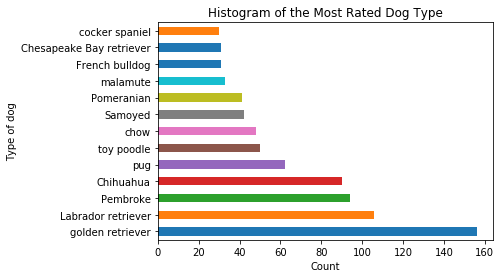

In [635]:
df_dog_type = tweet_archive.groupby('dog_breed').filter(lambda x: len(x) >= 25)

df_dog_type['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')


fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

#### Insight two :
#### floofer gets the highest average retweets while pupper gets the lowest average retweets

In [636]:
dogs_mean_data = tweet_archive.groupby('dog_stage').mean()
dogs_mean_data = dogs_mean_data['tweet_retweet_count'].sort_values()
dogs_mean_data

dog_stage
pupper            2382.502488
doggo,floofer     3433.000000
doggo,pupper      4397.250000
floofer           4968.714286
puppo             6473.954545
doggo             7125.698413
doggo,puppo      19196.000000
Name: tweet_retweet_count, dtype: float64

#### Insight three :
#### Brabancon griffon gets the lowest number of favourites while Saluki gets the highest favourites

In [637]:
dogs_mean_data = tweet_archive.groupby('dog_breed').mean()
dogs_mean_data = dogs_mean_data['tweet_favorite_count'].sort_values()
dogs_mean_data

dog_breed
Brabancon griffon                885.000000
groenendael                     1156.500000
Japanese spaniel                1362.000000
Irish wolfhound                 1534.000000
Tibetan terrier                 1841.000000
standard schnauzer              2046.000000
Scottish deerhound              2305.000000
basenji                         2503.777778
Lhasa                           2659.800000
EntleBucher                     2678.000000
Maltese dog                     2959.684211
toy terrier                     3181.666667
Ibizan hound                    3275.000000
redbone                         3296.333333
miniature schnauzer             3409.000000
soft-coated wheaten terrier     3431.500000
miniature poodle                3456.875000
Dandie Dinmont                  3464.571429
Shih-Tzu                        3593.350000
Scotch terrier                  3624.000000
Rhodesian ridgeback             4041.000000
Sussex spaniel                  4061.500000
papillon              